[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 5000
[7 3 4 6 1 8 1 0 9 8 0 3 1 2 7 0 2 9 6 0 1 6 7 1 9 7 6 5 5 8] 5000




[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.003s...


/Users/takashimac/Documents/Python/Meta/env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/takashimac/Documents/Python/Meta/env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 0.325s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 117.726212
[t-SNE] KL divergence after 300 iterations: 3.211183
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.002s...


/Users/takashimac/Documents/Python/Meta/env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/takashimac/Documents/Python/Meta/env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 0.842s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 597.112913
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.329208
[t-SNE] KL divergence after 300 iterations: 2.063918


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

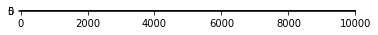

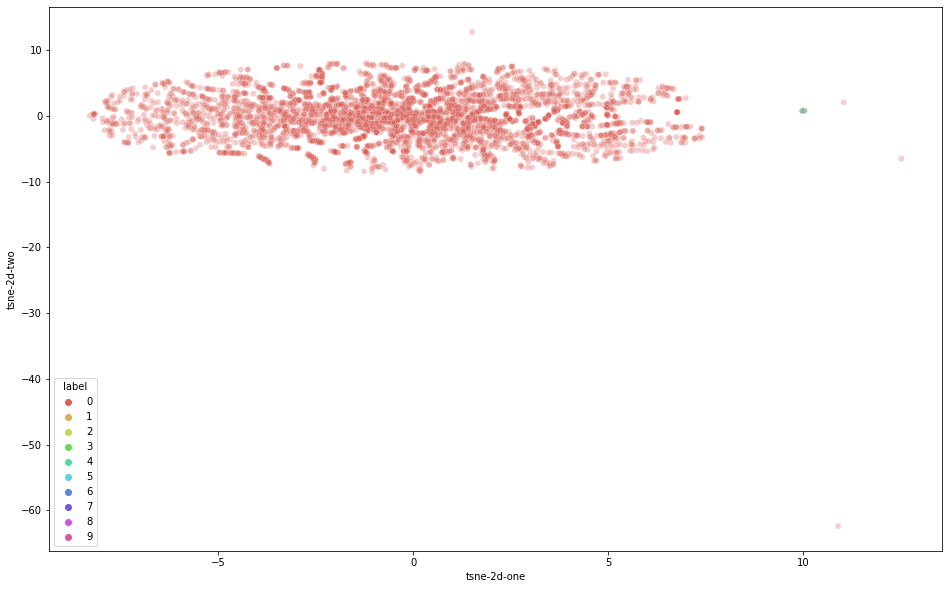

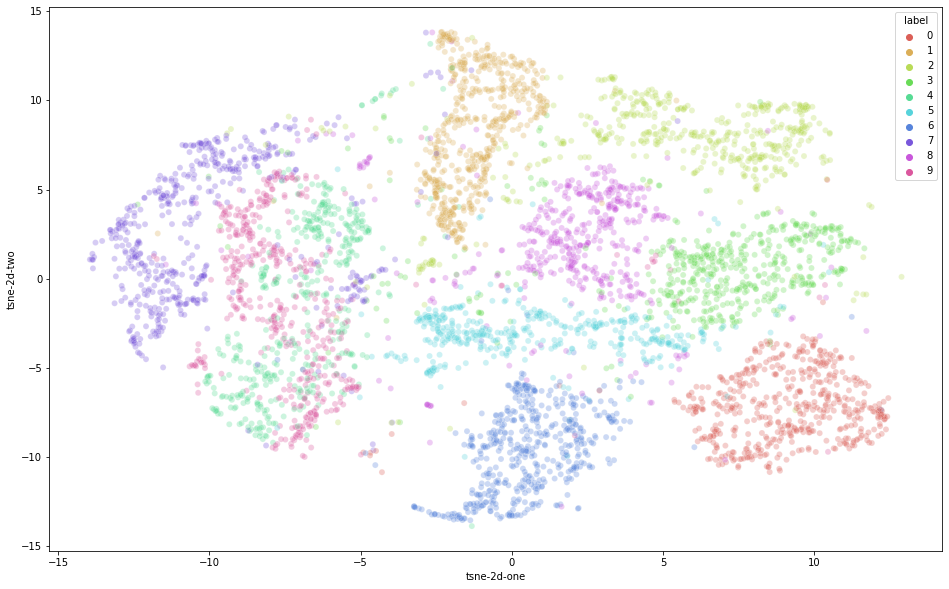

In [12]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../export/network/20211024_230509_10000_784_inhibit_neighbour_neurons_mnist_network/Output Layer.csv")
plt.imshow(df.to_numpy())
df = df.T
df = df[5000:10000]

MNIST_START = 5000
MNIST_END = 10000
mnist_data = np.load('../import/mnist.npz')
x_train = mnist_data["x_train"].reshape(60000, 784)[MNIST_START:MNIST_END]
y_train = mnist_data["y_train"][MNIST_START:MNIST_END]

df_mnist = pd.DataFrame(x_train)
# df_mnist["label"] = y_train

#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)

print(label[0:30], len(label))

print(y_train[0:30], len(y_train))
print("\n\n\n")

df_without_label = df
df["label"] = label
df
df_without_label = df.drop(columns=["label"])

# filtered_label2 = df[df["label"] == 2]
# filtered_label2

df_without_label
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


## Neuron TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_without_label)

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

## PCA

# pca = PCA(n_components=3)
# pca_result = pca.fit_transform(df_without_label)
# df['pca-one'] = pca_result[:,0]
# df['pca-two'] = pca_result[:,1]
# df['pca-three'] = pca_result[:,2]
# print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="pca-one", y="pca-two",
#     hue="label",
#     palette=sns.color_palette("hls", 10),
#     data=df,
#     legend="full",
#     alpha=0.3
# )
# Plot MNIST t-SNE or PCA

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_mnist)

df_mnist['tsne-2d-one'] = tsne_results[:,0]
df_mnist['tsne-2d-two'] = tsne_results[:,1]

df_mnist["label"] = y_train
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_mnist,
    legend="full",
    alpha=0.3
)



# pca = PCA(n_components=3)
# pca_result = pca.fit_transform(df_mnist)
# df_mnist['pca-one'] = pca_result[:,0]
# df_mnist['pca-two'] = pca_result[:,1] 
# df_mnist['pca-three'] = pca_result[:,2]
# print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# df_mnist["label"] = y_train
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="pca-one", y="pca-two",
#     hue="label",
#     palette=sns.color_palette("hls", 10),
#     data=df_mnist,
#     legend="full",
#     alpha=0.3
# )
